In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os

In [3]:
ROOT = 'D:/Documents/checkpoints'

In [25]:
def visualize(path: str, deblocking: bool = False):
    df = pd.read_hdf(f'{path}/compression_metrics.h5')

    paths = glob.glob(os.path.join(path, '*.png'))[:2]
    images = list(map(lambda path: Image.open(path), paths))

    fig, ax = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('Images')
    ax[0].imshow(images[0])
    ax[1].imshow(images[1])

    fig, ax = plt.subplots(2, 2, figsize=(16, 16))
    fig.suptitle('Metrics of PSNR, MS_SSIM, bpp')

    psnr = df['PSNR_deblocked'] if deblocking else df['PSNR']
    ax[0][0].hist(psnr)
    ax[0][0].set_title(f'PSNR density $\mu={psnr.mean():.2f}$')

    ms_ssim = df['MS_SSIM_deblocked'] if deblocking else df['MS_SSIM']
    ax[0][1].hist(ms_ssim)
    ax[0][1].set_title(f'MS_SSIM density $\mu={ms_ssim.mean():.4f}$')

    ax[1][0].scatter(df['q_bpp'], df['PSNR'])
    ax[1][0].set_title('PSNR / bpp scatter')

    ax[1][1].scatter(df['q_bpp'], df['MS_SSIM'])
    ax[1][1].set_title('MS_SSIM / bpp scatter')

    return df['PSNR'].mean(), df['MS_SSIM'].mean(), df['q_bpp'].mean()

In [33]:
means = []

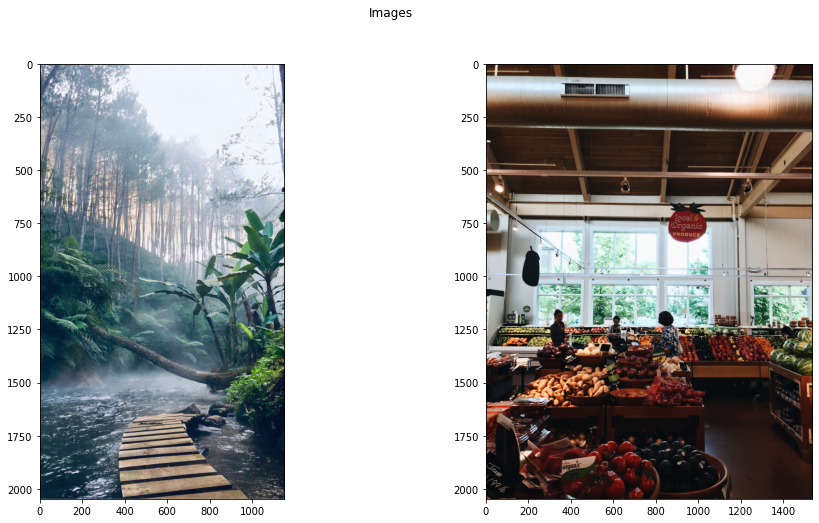

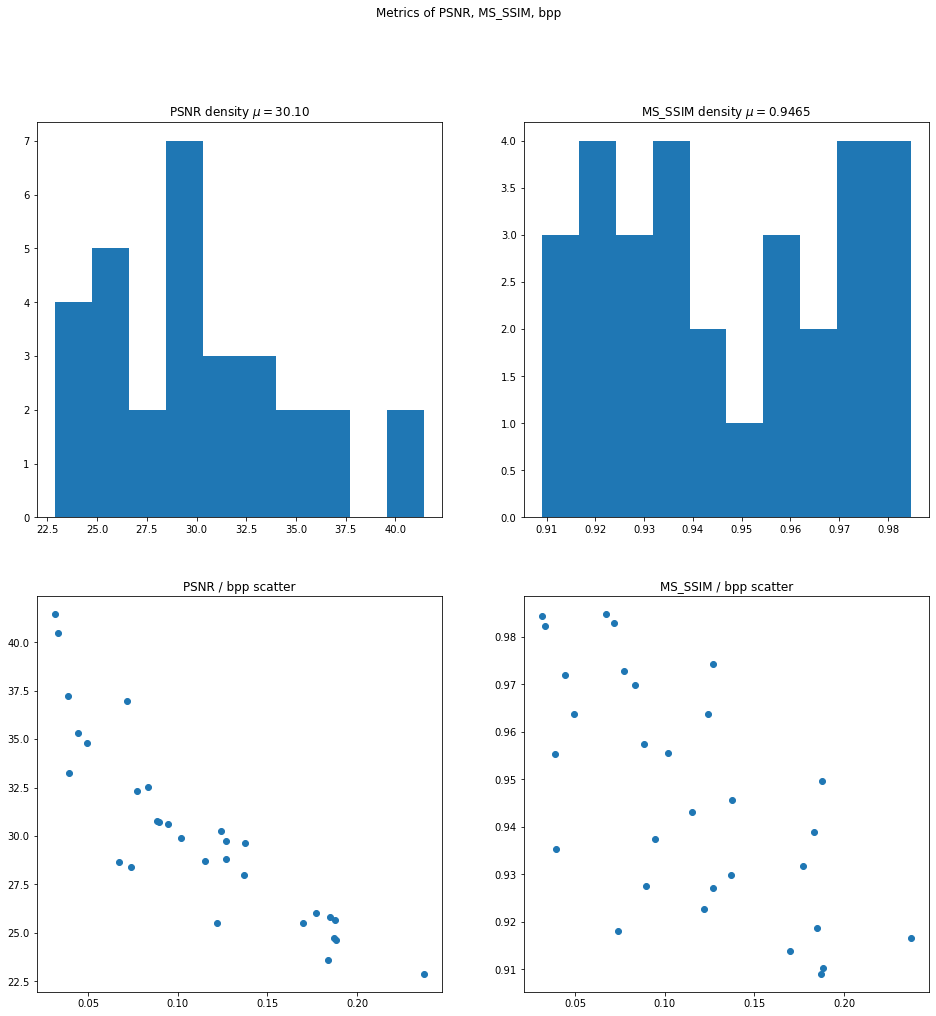

In [34]:
means += visualize(f'{ROOT}/low')

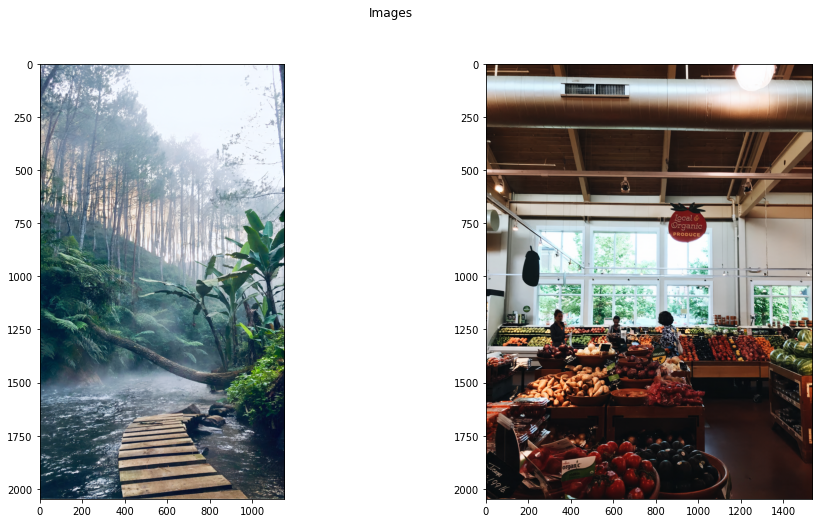

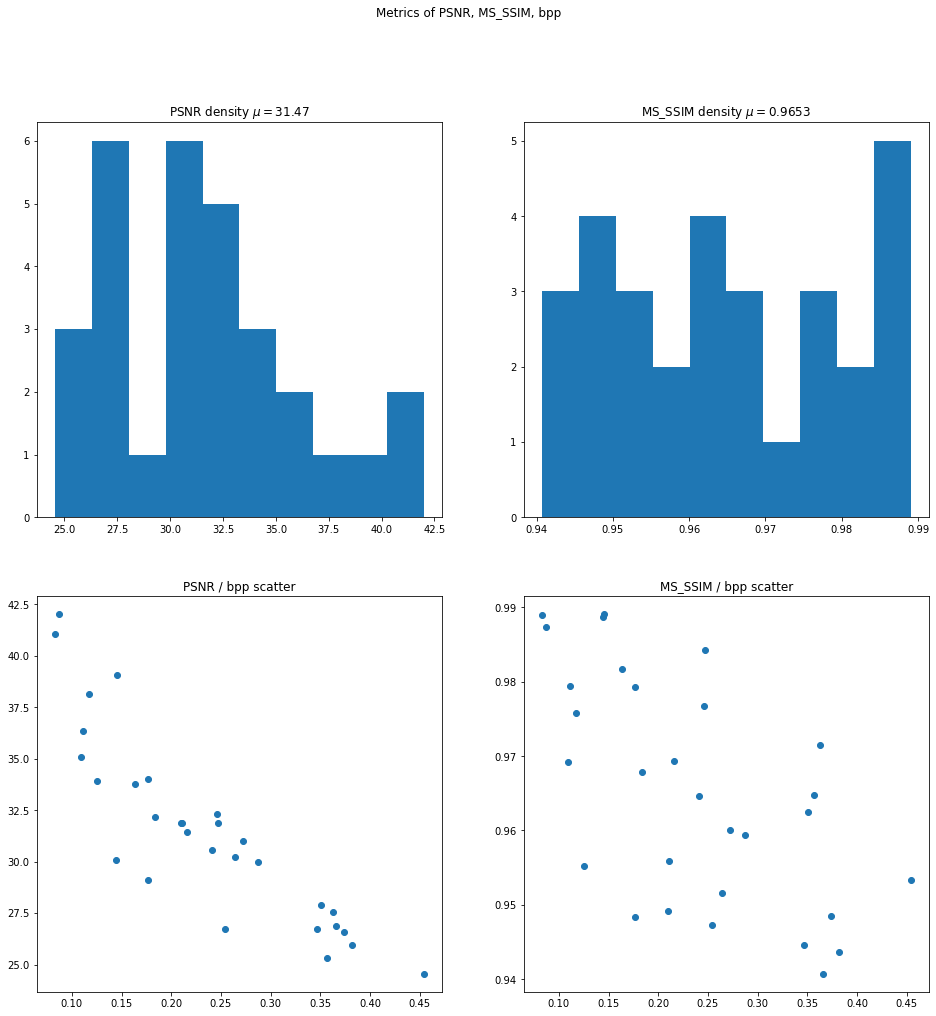

In [35]:
means += visualize(f'{ROOT}/med')

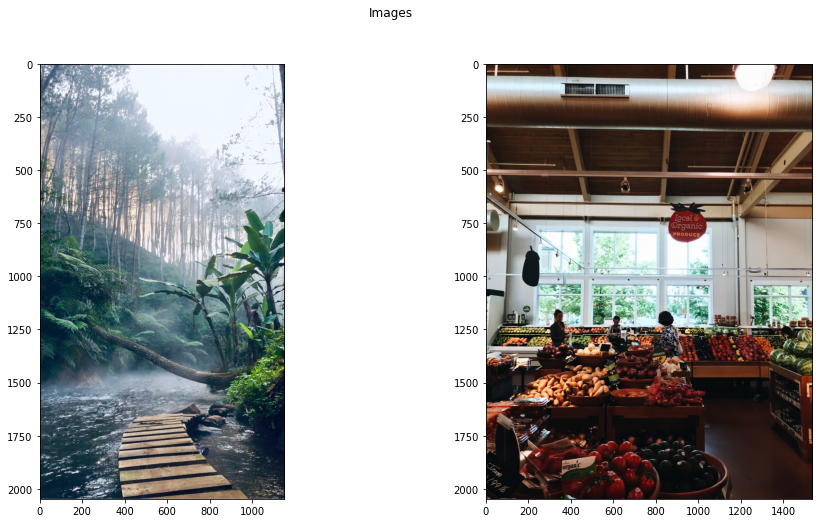

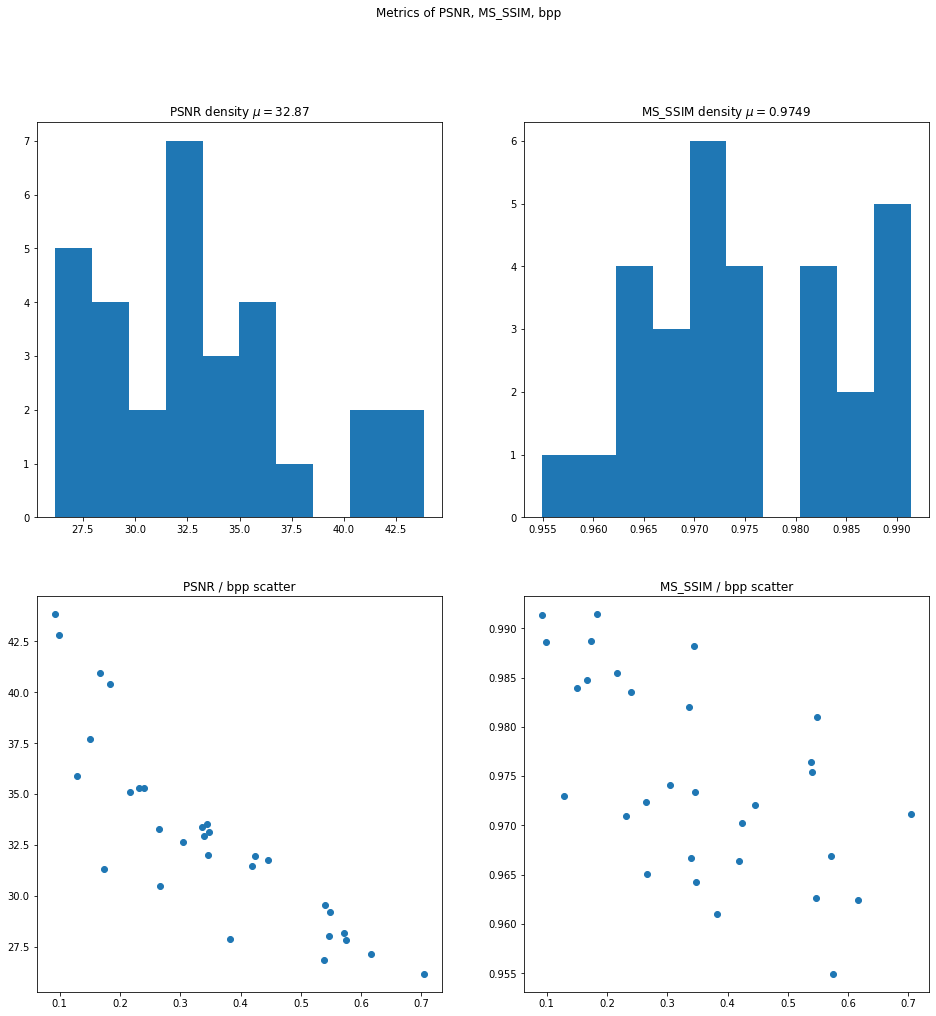

In [36]:
means += visualize(f'{ROOT}/hi')

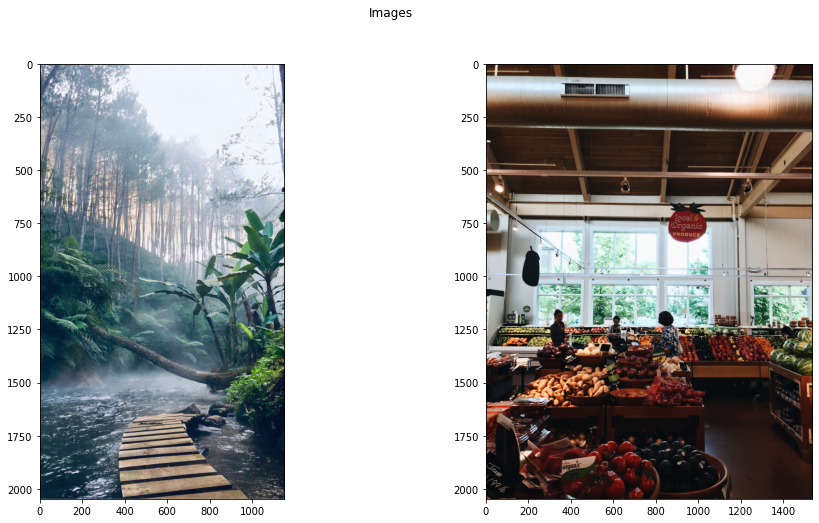

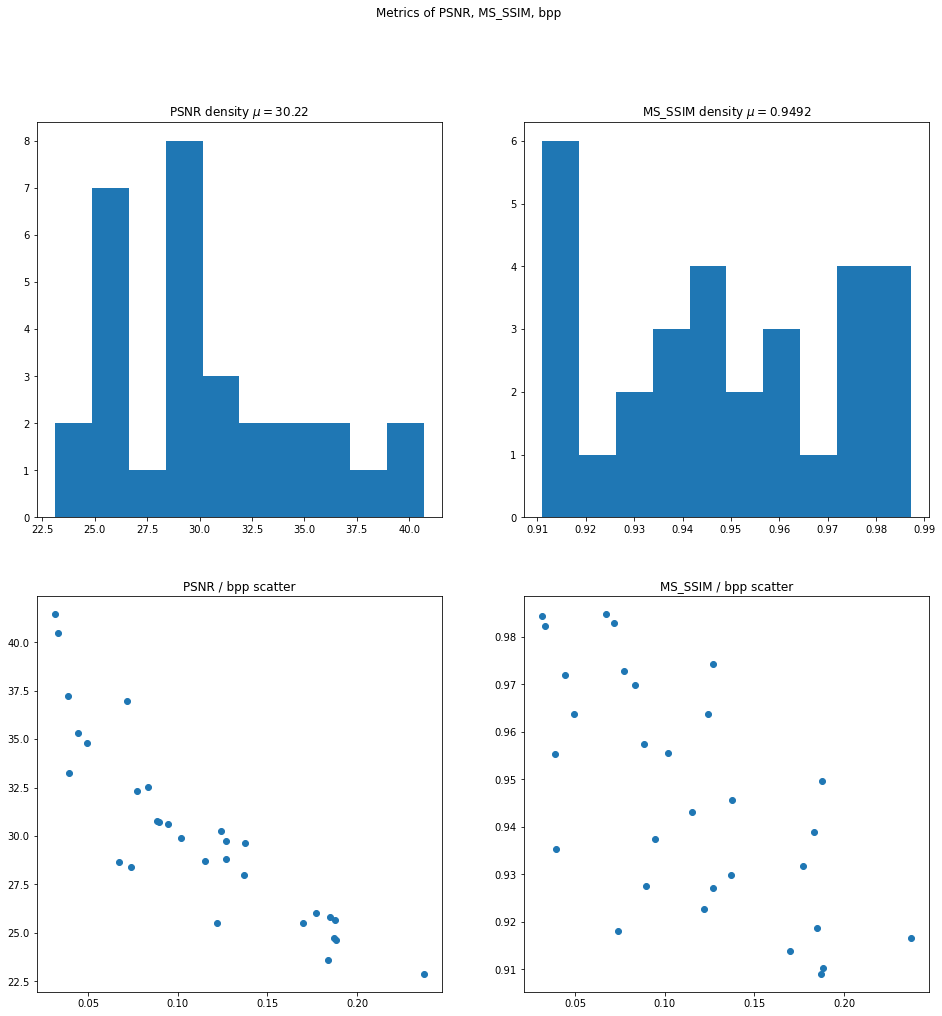

In [37]:
means += visualize(f'{ROOT}/reconstructions_deblocking_low', True)

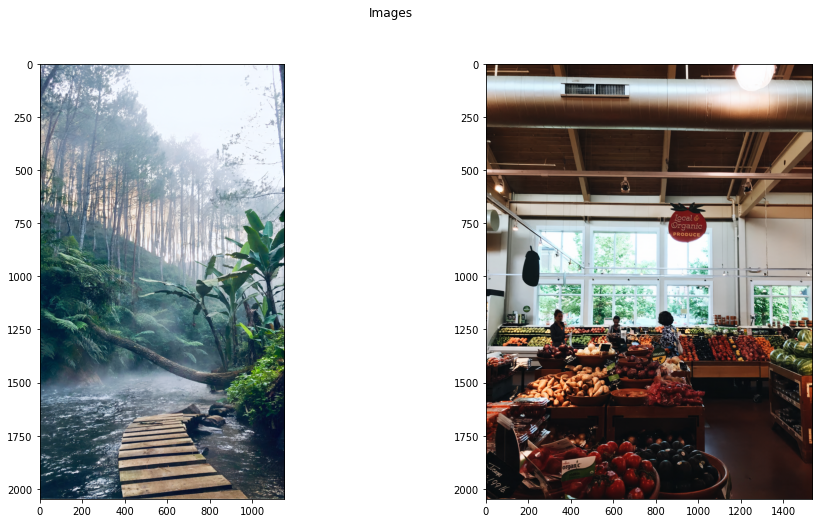

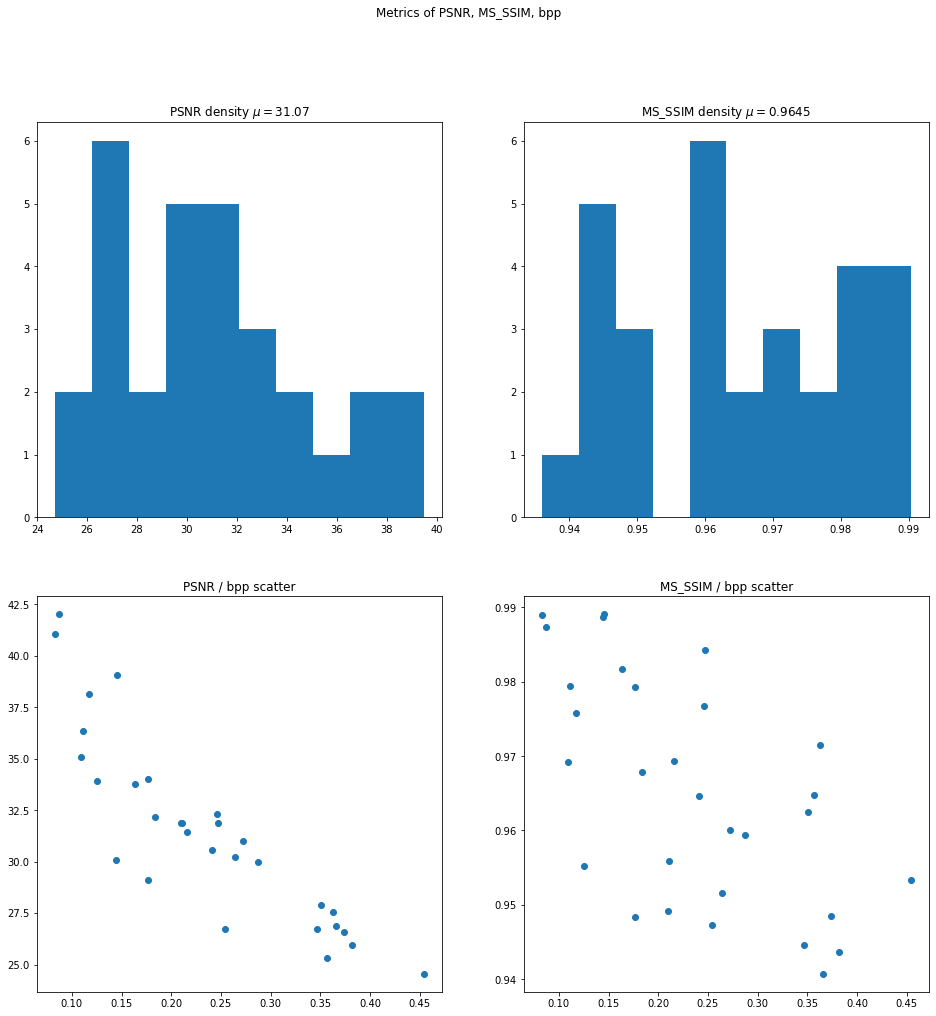

In [38]:
means += visualize(f'{ROOT}/reconstructions_deblocking_med', True)

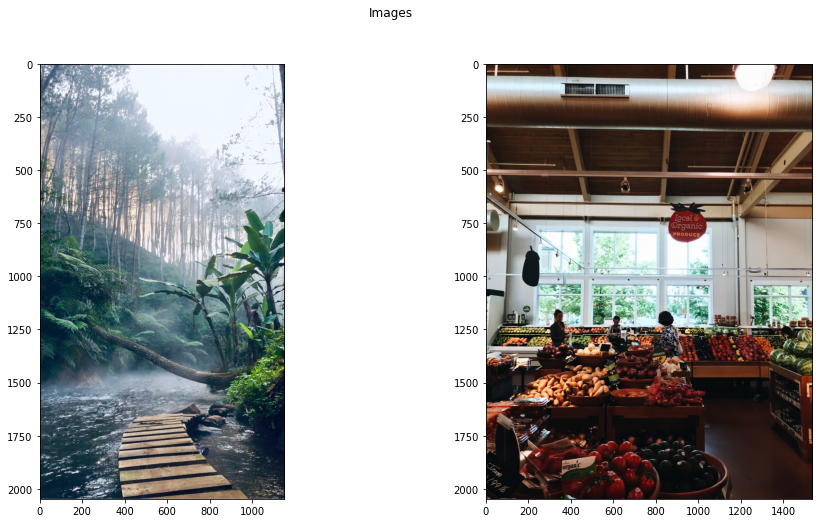

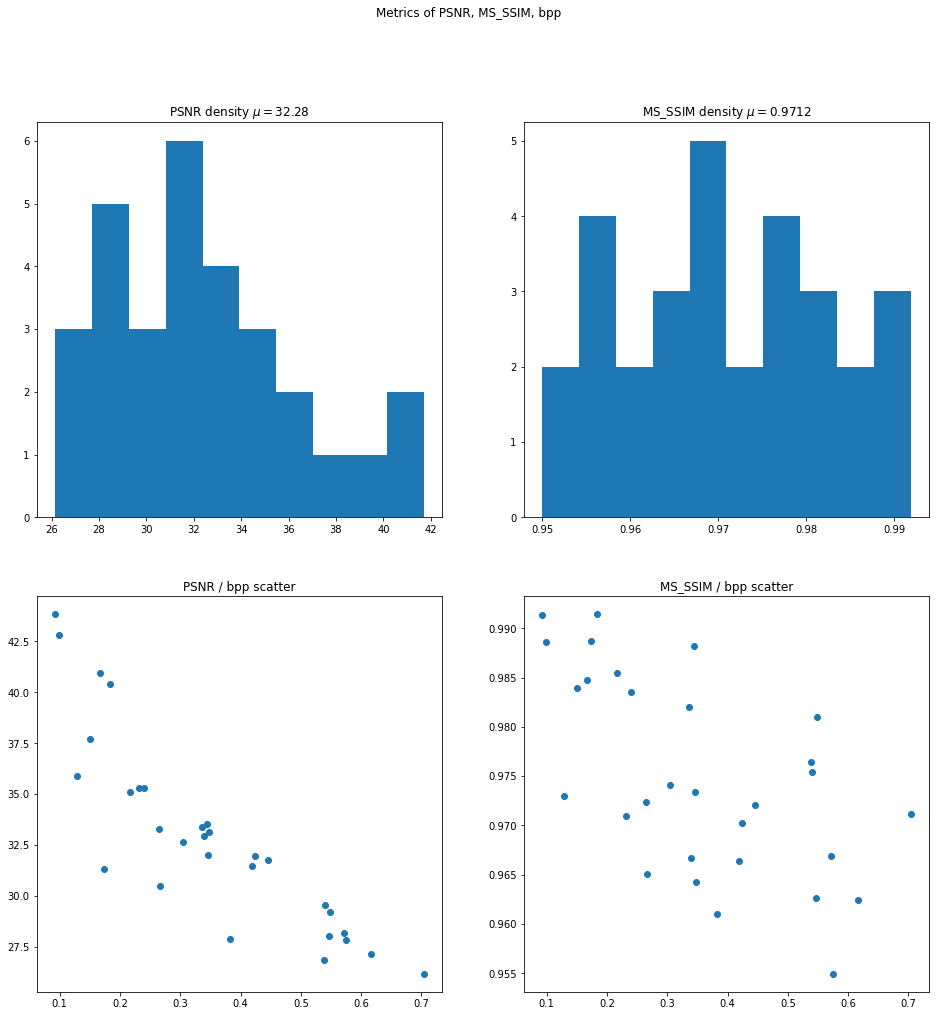

In [39]:
means += visualize(f'{ROOT}/reconstructions_deblocking_hi', True)

Text(0.5, 1.0, 'PSNR / bpp')

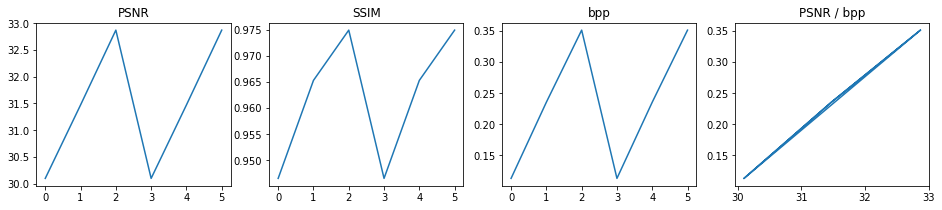

In [40]:
fig, ax = plt.subplots(1, 4, figsize=(16, 3))

ax[0].plot([i for i in range(len(means[::3]))], list(means[::3]))
ax[0].set_title('PSNR')
ax[1].plot([i for i in range(len(means[1::3]))], list(means[1::3]))
ax[1].set_title('SSIM')
ax[2].plot([i for i in range(len(means[2::3]))], list(means[2::3]))
ax[2].set_title('bpp')
ax[3].plot(means[::3], means[2::3])
ax[3].set_title('PSNR / bpp')


In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

ax[0][0].imshow(Image.open(f'{ROOT}/compression/epoch_10/00046b471483cc63_RECON_1.093bpp.png'))
ax[0][0].set_title('Epoch 10 (compression)')
ax[0][1].imshow(Image.open(f'{ROOT}/compression_gan/epoch_4/00046b471483cc63_RECON_1.391bpp.png'))
ax[0][1].set_title('Epoch 4 (GAN)')
ax[1][0].imshow(Image.open(f'{ROOT}/compression_gan/epoch_5/00046b471483cc63_RECON_1.257bpp.png'))
ax[1][0].set_title('Epoch 5 (GAN)')
ax[1][1].imshow(Image.open(f'{ROOT}/compression_gan/epoch_6/00046b471483cc63_RECON_1.323bpp.png'))
ax[1][1].set_title('Epoch 6 (GAN)')

ValueError: x and y must have same first dimension, but have shapes (3,) and (6,)

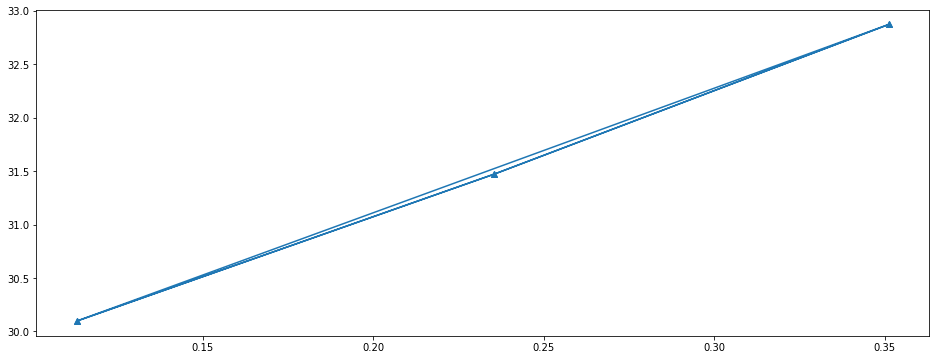

In [41]:
psnr_means = means[::3]

original = [30, 32.2, 33.5]
original_bpp = [0.14, 0.35, 0.52]

fig, ax = plt.subplots(1, 1, figsize=(16, 6))
ax.plot(means[2::3], psnr_means, "^-")
ax.plot(original_bpp, psnr_means, "^-")
ax.plot(original_bpp, original, "^-")
ax.legend(["my result with actual mean BPP", "my result with rounded BPP", "paper with rounded BPP" ])
ax.set_xlabel("Bits per pixel (bpp)")
ax.set_ylabel("Pike signal to noise ration (PSNR)")

In [1]:
import torch
from deblocking.CNNs.mymodel import ARCNN, ARDenseNet, L8
from deblocking.MultiScale.MS_model import IntraDeblocking

parameters = [
    r'D:\Documents\project\thesis\deblocking\model_parameters\MSqp42-124-0.001293-29.0237-0.8455param.pth',
    r'D:\Documents\project\thesis\deblocking\model_parameters\L8_qp42-99-0.001374-28.6387-0.8429param.pth'
]

models = [
    IntraDeblocking, L8
]

model = L8()
model.load_state_dict(torch.load(parameters[0]))
model.to(torch.device('cuda'))

L8(
  (conv1): Conv2d(3, 32, kernel_size=(11, 11), stride=(1, 1), padding=(5, 5))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv6): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv7): Conv2d(96, 128, kernel_size=(1, 1), stride=(1, 1))
  (conv8): Conv2d(128, 3, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
)

INPUT : torch.Size([1, 3, 128, 192])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


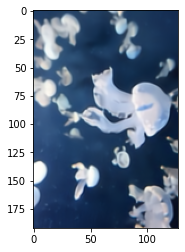

In [5]:
from PIL import Image
from torchvision import transforms as T

image = Image.open(r'D:\Documents\project\thesis\data\reconstructions\alberto-montalesi-176097_RECON_0.068bpp.png')
transform = T.Compose([
    T.Resize((128,)),
    T.ToTensor()
])
image = transform(image.convert('RGB')).cuda()

input = image.unsqueeze(0) # torch.rand((1, 3, 64, 64)).cuda()
print(f'INPUT : {input.shape}')
output = model(input).detach().cpu()

import matplotlib.pyplot as plt

plt.imshow(output[0].transpose(0, 2))

In [ ]:
from 